In [2]:
import ROOT
import numpy as np
import pandas as pd 
import json

ROOT.gROOT.ProcessLine( "gErrorIgnoreLevel = kError;");

Welcome to JupyROOT 6.29/01


# Model

In [3]:
def model1_1(nbulks, bulksize, dim):
    T_d = 0
    T_u = 0
    T_RDF = 0 
    T_gb = 0
    T_mb = 0
    T_fb = 0
    T_usb = 0
    return T_d + T_u + T_RDF + np.sum([T_gb + T_mb + T_fb + T_usb for _ in range(nbulks)])

def model1_2_fb(fixed, bulksize):
    if fixed:
        return bulksize * (T_alg1_16 + T_alg1_23)
    return bulksize * (T_alg1_18 + T_alg1_23)

def model1_2_usb(x, p):
    return p[0] + x[0] * p[1] + x[0] * (x[0]-1) / 2 * p[2]
    # return T_alg1_3 + dim * T_alg1_5_6 + dim * (dim-1) / 2 * T_alg1_8

# Validation

## Update Stats Bulk

In [4]:
filename = "results.json" 
with open(filename, "r") as f:
    jdata = json.load(f)

usb_df = pd.DataFrame.from_dict(jdata["benchmarks"]).astype({"real_time" : float})
usb_df["dim"] = usb_df["name"].apply(lambda s: float(s.split("/")[1]))
usb_df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,dim
0,BM_UpdateStats/2/manual_time,0,0,BM_UpdateStats/2/manual_time,iteration,1,0,1,19692,0.038563,0.000405,ms,2.0
1,BM_UpdateStats/4/manual_time,0,1,BM_UpdateStats/4/manual_time,iteration,1,0,1,10606,0.072415,0.000664,ms,4.0
2,BM_UpdateStats/8/manual_time,0,2,BM_UpdateStats/8/manual_time,iteration,1,0,1,3848,0.199219,0.001105,ms,8.0
3,BM_UpdateStats/16/manual_time,0,3,BM_UpdateStats/16/manual_time,iteration,1,0,1,1162,0.608984,0.001858,ms,16.0
4,BM_UpdateStats/32/manual_time,0,4,BM_UpdateStats/32/manual_time,iteration,1,0,1,329,2.108967,0.003981,ms,32.0
5,BM_UpdateStats/64/manual_time,0,5,BM_UpdateStats/64/manual_time,iteration,1,0,1,84,9.305107,0.013292,ms,64.0
6,BM_UpdateStats/128/manual_time,0,6,BM_UpdateStats/128/manual_time,iteration,1,0,1,23,29.481217,0.034939,ms,128.0


****************************************
Minimizer is Minuit / Migrad
Chi2                      =     0.871649
NDf                       =            4
Edm                       =  6.06768e-22
NCalls                    =           66
p0                        =    -0.313495   +/-   0.295689    
p1                        =     0.051352   +/-   0.0160578   
p2                        =   0.00286851   +/-   0.000246142 


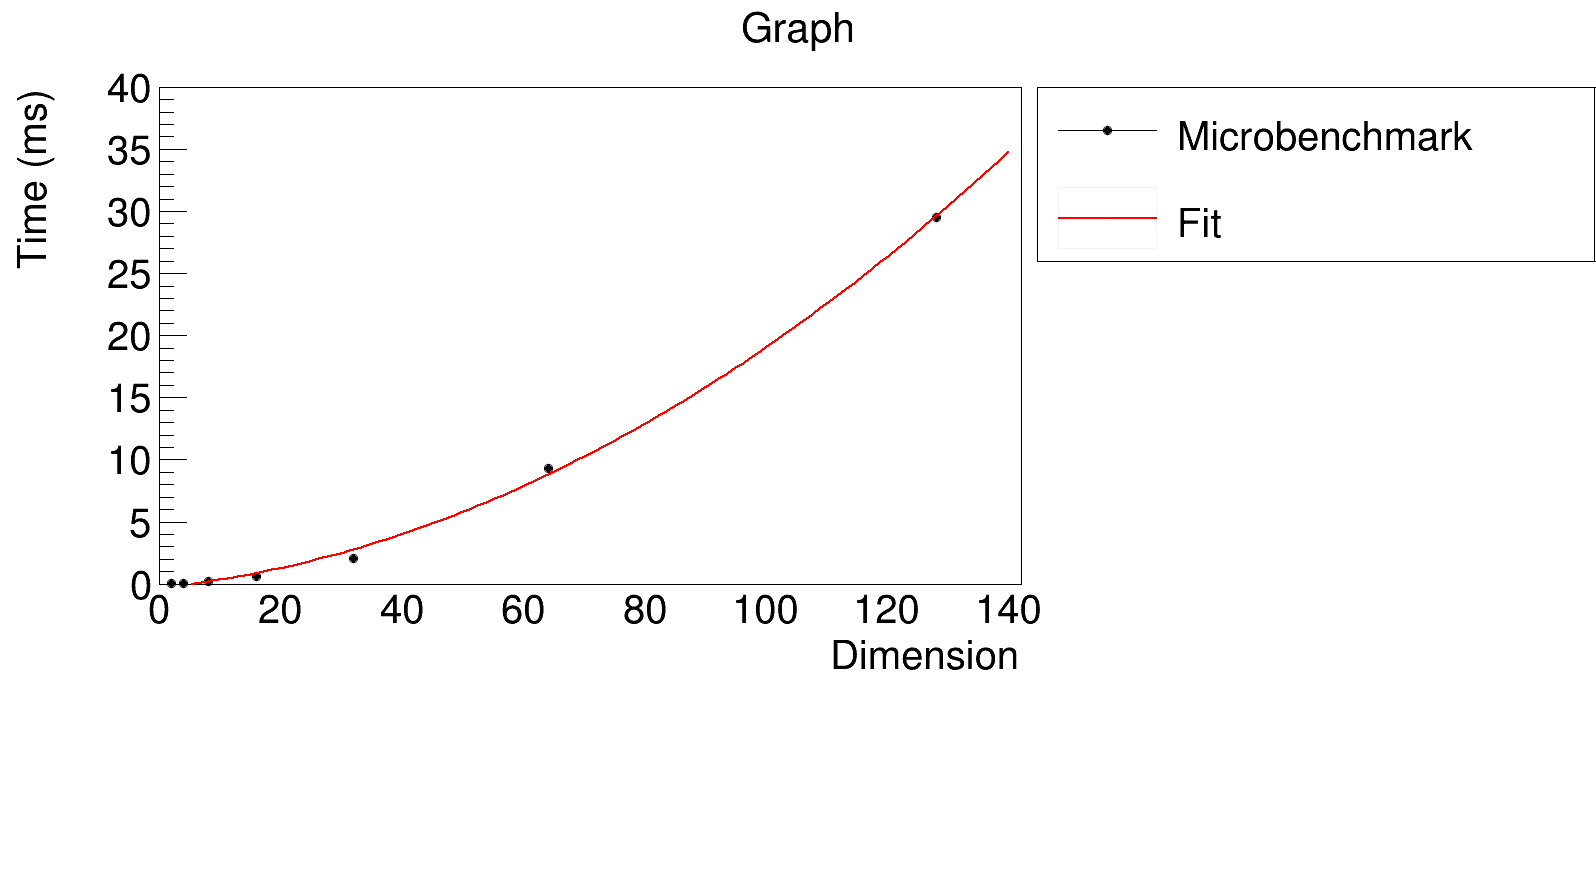

In [7]:
title=""
w = 1600
h = 900
c = ROOT.TCanvas("c1", title, w, h)
c.SetRightMargin(0.36)
c.SetBottomMargin(0.33)

l = ROOT.TLegend(0.65, 0.7, 1, 0.9)
l.SetTextSize(0.05)

g = ROOT.TGraph(len(usb_df["dim"]), usb_df["dim"].values, usb_df["real_time"].values)
g.SetMarkerSize(1)
g.SetMarkerStyle(8)
g.Draw("AP")
l.AddEntry(g, "Microbenchmark")

f_usb = ROOT.TF1("f_usb", model1_2_usb, 1, 200, 3)
fit = g.Fit(f_usb)
l.AddEntry(f_usb, "Fit")

xaxis = g.GetXaxis()
xaxis.SetTitle("Dimension")
# xaxis.SetTitleOffset(3)
xaxis.SetTitleSize(0.05)
xaxis.SetTickSize(0)
xaxis.SetLabelSize(0.05)
xaxis.LabelsOption("vM")
xaxis.SetRangeUser(0, 200)

yaxis = g.GetYaxis()
yaxis.SetTitle(f"Time ({usb_df['time_unit'][0]})")
yaxis.SetTitleSize(0.05)
yaxis.SetLabelSize(0.05)
yaxis.SetRangeUser(0, 40)


l.Draw()
c.Draw()